<a href="https://colab.research.google.com/github/4hmetcakmak/PythonDataScienceHandbook/blob/master/CEVPandasTasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task-1A**

In [ ]:
import pandas as pd
import numpy as np
rng=np.random.RandomState(42)
x=pd.Series(rng.randint(15,69,99))
x[x>50].count() #50'den büyük kaç tane değer var 

35

**TASK-1B**

In [ ]:
import pandas as pd
import numpy as np 
df=pd.DataFrame(np.random.uniform(1,10,(50,5)),columns=["A","B","C","D","E"]) #Please provide a 2d Pandas DataFrame
print(df) 
#(of size 50 x 5) that is full of random floating numbers between 1 and 9.99
higherRow=df.iloc[:,:].sum(axis=1)>30#rows values sum that are higher than 30
higherColumn=df.loc[:,:].sum(axis=0)>300 #sütunlar az olduğu için elle yaptım ve hiç toplam 300ü geçen sütun yok 
print(higherRow)
print(higherColumn)

           A         B         C         D         E
0   7.557797  5.830758  1.137446  8.691438  7.085861
1   9.503563  9.300739  9.777992  1.720220  3.356105
2   3.891614  5.920066  2.374769  2.758021  6.948782
3   1.865672  4.176144  8.030656  8.182970  3.513712
4   4.691956  8.787806  9.845205  2.339391  5.493491
5   6.972533  5.032766  2.021263  9.441575  9.114170
6   7.404355  8.720622  7.162561  8.949119  7.889433
7   7.581773  7.040342  7.357016  5.028673  6.808786
8   9.065124  8.345104  1.142378  8.747112  2.825606
9   7.627074  2.495978  7.237526  5.355939  5.737036
10  5.539121  8.522802  1.718678  6.487413  2.853562
11  6.707720  6.629556  3.047992  6.739053  3.055530
12  3.127964  9.517794  3.255688  5.359991  4.519891
13  8.499963  8.750626  5.026389  4.990862  8.771477
14  8.451806  3.859319  6.081350  7.435587  6.632108
15  1.482188  4.098375  7.764222  9.903430  3.025433
16  1.387662  3.612479  3.782737  1.640879  7.405945
17  3.485655  8.107431  4.397789  9.611176  1.

**TASK-2A**

In [ ]:
import pandas as pd
df1=pd.DataFrame({"Names": ["Jack","Sarah","Michael","Kane","Elsonn","Scarlet","Henry"],"Height_(cm)": [170, 168, 187, 185, 190, 173, 193]})
df2=pd.DataFrame({"Names": ["Jack","Sarah","Michael","Kane","Elsonn","Scarlet","Henry"], "Weight_(Kg)": [69, 60, 85,82,78, 60, 92 ]})
df3=pd.DataFrame({"Names": ["Jack","Sarah","Michael","Kane","Elsonn","Scarlet","Henry"],"Foot_Sizes" : [40,38,43,43,37,36,42]})
a=pd.merge(df1,df2)
a=pd.merge(a, df3).set_index("Names")
a

,Height_(cm),Weight_(Kg),Foot_Sizes
Names,,,
Jack,170,69,40
Sarah,168,60,38
Michael,187,85,43
Kane,185,82,43
Elsonn,190,78,37
Scarlet,173,60,36
Henry,193,92,42


**TASK-2B**

In [ ]:
a["Body_mass_ındex"]=a["Weight_(Kg)"]/((a["Height_(cm)"]/100)**2)
a

,Height_(cm),Weight_(Kg),Foot_Sizes,Body_mass_ındex
Names,,,,
Jack,170,69,40,23.875433
Sarah,168,60,38,21.258503
Michael,187,85,43,24.307244
Kane,185,82,43,23.959094
Elsonn,190,78,37,21.606648
Scarlet,173,60,36,20.047446
Henry,193,92,42,24.698650


**TASK-2C**

In [ ]:
#belki daha kısa yolu vardır ancak ben aradığımda da sadece sampleı buldum np.random.choice ise tek boyutlu olarak çalışıyordu ben de ilk elimdeki df'i array yaotım 
y=np.array(a)
y=np.ravel(y) #array yaptıktan sonra ravel fonksiyonu ile tek boyutlu hale getirdim 
rng=np.random.RandomState(42) #sonra burada her çalıştırdığında sabit değer dönmesiiçin sabitleme yaptım 
print(rng.choice(y,3)) #3 random hücre seçtirdim 
#bunları da aşağıda gösterdim
a.loc["Sarah", "Foot_Sizes"]=np.nan
a.loc["Elsonn", "Body_mass_ındex"]=np.nan
a.loc["Kane", "Foot_Sizes"]=np.nan
a

[38.        21.6066482 43.       ]


,Height_(cm),Weight_(Kg),Foot_Sizes,Body_mass_ındex
Names,,,,
Jack,170,69,40.0,23.875433
Sarah,168,60,NaN,21.258503
Michael,187,85,43.0,24.307244
Kane,185,82,NaN,23.959094
Elsonn,190,78,37.0,NaN
Scarlet,173,60,36.0,20.047446
Henry,193,92,42.0,24.698650


**TASK-2D**

In [ ]:
a.fillna(method="ffill")

,Height_(cm),Weight_(Kg),Foot_Sizes,Body_mass_ındex
Names,,,,
Jack,170,69,40.0,23.875433
Sarah,168,60,40.0,21.258503
Michael,187,85,43.0,24.307244
Kane,185,82,43.0,23.959094
Elsonn,190,78,37.0,23.959094
Scarlet,173,60,36.0,20.047446
Henry,193,92,42.0,24.698650


**TASK-3A**

In [ ]:
a=[("Jack",2021),("Jack",2022),("Sarah", 2021),("Sarah",2022), ("Michael", 2021),("Michael", 2022), ("Kane", 2021),("Kane",2022)]
weights=pd.Series([72,69,58,60,90,85,79,82], index=(a))
index=pd.MultiIndex.from_tuples(a)
weights=weights.reindex(index)
heights=pd.Series([169,170,168,168,184,187,185,185], index=(a))
df= pd.DataFrame({"Weights":weights, "Heights": heights})
df

Weights  Heights
Jack    2021       72      169
        2022       69      170
Sarah   2021       58      168
        2022       60      168
Michael 2021       90      184
        2022       85      187
Kane    2021       79      185
        2022       82      185

**TASK-3B**

In [ ]:
print(df.groupby("Weights").aggregate("mean"))
print(df.groupby("Heights").aggregate("mean"))
names=["jack","jack","sarah","sarah","michael","michael","kane","kane"]
df.groupby(names).aggregate("mean")

         Heights
Weights         
58         168.0
60         168.0
69         170.0
72         169.0
79         185.0
82         185.0
85         187.0
90         184.0
         Weights
Heights         
168         59.0
169         72.0
170         69.0
184         90.0
185         80.5
187         85.0


,Weights,Heights
jack,70.5,169.5
kane,80.5,185.0
michael,87.5,185.5
sarah,59.0,168.0


**TASK-3C**

In [ ]:
print(df.stack()) 
print(df.unstack())
print(df.reset_index(inplace=True))
df.set_index(["level_0","level_1"])

Jack     2021  Weights     72
               Heights    169
         2022  Weights     69
               Heights    170
Sarah    2021  Weights     58
               Heights    168
         2022  Weights     60
               Heights    168
Michael  2021  Weights     90
               Heights    184
         2022  Weights     85
               Heights    187
Kane     2021  Weights     79
               Heights    185
         2022  Weights     82
               Heights    185
dtype: int64
        Weights      Heights     
           2021 2022    2021 2022
Jack         72   69     169  170
Kane         79   82     185  185
Michael      90   85     184  187
Sarah        58   60     168  168
None


Weights  Heights
level_0 level_1                  
Jack    2021          72      169
        2022          69      170
Sarah   2021          58      168
        2022          60      168
Michael 2021          90      184
        2022          85      187
Kane    2021          79      185
        2022          82      185

**TASK-4A**

*Not: 3-4 hücreye bölerek yaptım bu task'i*

In [ ]:
import numpy as np
import pandas as pd
rng=np.random.RandomState(42)
a=rng.randint(0,100,(5,6))
sayısal_kursu=pd.DataFrame(a,index=["Ali","Veli","Ayşe","Fatma","Burçin"], columns=["Fizik","Kimya","Matematik","İngilizce","Geometri","Biyoloji"])
print(sayısal_kursu)
b=rng.randint(0,100,(6,7))
dil_kursu=pd.DataFrame(b, index=["Ali","Veli","Ayşe","Fatma","Burçin","Tuğçe"], columns=["Almanca","İngilizce","İngiliz_Edebiyatı","Temel_Fransızca","Türk_Edebiyatı","Aksan_Eğitimi","Konuşma_Eğitimi"])
print(dil_kursu)

        Fizik  Kimya  Matematik  İngilizce  Geometri  Biyoloji
Ali        51     92         14         71        60        20
Veli       82     86         74         74        87        99
Ayşe       23      2         21         52         1        87
Fatma      29     37          1         63        59        20
Burçin     32     75         57         21        88        48
        Almanca  İngilizce  İngiliz_Edebiyatı  Temel_Fransızca  \
Ali          90         58                 41               91   
Veli         61         61                 46               61   
Ayşe          2         50                  6               20   
Fatma         3         88                 59               13   
Burçin        1         83                 91               59   
Tuğçe        46         34                 77               80   

        Türk_Edebiyatı  Aksan_Eğitimi  Konuşma_Eğitimi  
Ali                 59             79               14  
Veli                50             54        

In [ ]:
merge_df= pd.merge(sayısal_kursu,dil_kursu,left_index=True,right_index=True)
merge_df

,Fizik,Kimya,Matematik,İngilizce_x,Geometri,Biyoloji,Almanca,İngilizce_y,İngiliz_Edebiyatı,Temel_Fransızca,Türk_Edebiyatı,Aksan_Eğitimi,Konuşma_Eğitimi
Ali,51,92,14,71,60,20,90,58,41,91,59,79,14
Veli,82,86,74,74,87,99,61,61,46,61,50,54,63
Ayşe,23,2,21,52,1,87,2,50,6,20,72,38,17
Fatma,29,37,1,63,59,20,3,88,59,13,8,89,52
Burçin,32,75,57,21,88,48,1,83,91,59,70,43,7


In [ ]:
join_df=dil_kursu.join(sayısal_kursu,how="left",lsuffix='İngilizce') #join 
join_df

,Almanca,İngilizceİngilizce,İngiliz_Edebiyatı,Temel_Fransızca,Türk_Edebiyatı,Aksan_Eğitimi,Konuşma_Eğitimi,Fizik,Kimya,Matematik,İngilizce,Geometri,Biyoloji
Ali,90,58,41,91,59,79,14,51.0,92.0,14.0,71.0,60.0,20.0
Veli,61,61,46,61,50,54,63,82.0,86.0,74.0,74.0,87.0,99.0
Ayşe,2,50,6,20,72,38,17,23.0,2.0,21.0,52.0,1.0,87.0
Fatma,3,88,59,13,8,89,52,29.0,37.0,1.0,63.0,59.0,20.0
Burçin,1,83,91,59,70,43,7,32.0,75.0,57.0,21.0,88.0,48.0
Tuğçe,46,34,77,80,35,49,3,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
concat_df=pd.concat([sayısal_kursu,dil_kursu],join="inner") #concat
concat_df

,İngilizce
Ali,71
Veli,74
Ayşe,52
Fatma,63
Burçin,21
Ali,58
Veli,61
Ayşe,50
Fatma,88
Burçin,83


**TASK-4B**

*NOT: Bu task de çok hücreye bölünmüş şekildedir*

In [ ]:
#Import the datasets for the USA population example.
import pandas as pd
import numpy as np
!curl -O https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57935  100 57935    0     0   284k      0 --:--:-- --:--:-- --:--:--  284k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   835  100   835    0     0   5060      0 --:--:-- --:--:-- --:--:--  5060
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   872  100   872    0     0   4589      0 --:--:-- --:--:-- --:--:--  4589


In [ ]:
#Then you are supposed to change one of the names of the states in areas by hand to a capital one such as from Alabama to ALABAMA.

#Then you should change all of the state names in areas and abbrevs to uppercase letters.

#Then you should add another column to the area data frame as km square and convert the values in the area column to km square in the new column.

abb=pd.read_csv("state-abbrevs.csv")
population= pd.read_csv("state-population.csv")
areas=pd.read_csv("state-areas.csv")
areas.loc[0,"state"]="ALABAMA"
abb["state"]=abb["state"].str.upper()
areas["state"]=areas["state"].str.upper()
areas["Km2"]=areas["area (sq. mi)"]*2.6

In [ ]:
#Please merge the pandas’ data frames as done in the presented example and please name this dataframe as "final_df".
merge_df=pd.merge(population, abb, how="outer", left_on="state/region" ,right_on="abbreviation")
merge_df= merge_df.drop('abbreviation',1)
final_df=pd.merge(merge_df, areas)
final_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,state/region,ages,year,population,state,area (sq. mi),Km2
0,AL,under18,2012,1117489.0,ALABAMA,52423,136299.8
1,AL,total,2012,4817528.0,ALABAMA,52423,136299.8
2,AL,under18,2010,1130966.0,ALABAMA,52423,136299.8
3,AL,total,2010,4785570.0,ALABAMA,52423,136299.8
4,AL,under18,2011,1125763.0,ALABAMA,52423,136299.8
...,...,...,...,...,...,...,...
2443,WY,under18,1993,137458.0,WYOMING,97818,254326.8
2444,WY,total,1991,459260.0,WYOMING,97818,254326.8
2445,WY,under18,1991,136720.0,WYOMING,97818,254326.8
2446,WY,under18,1990,136078.0,WYOMING,97818,254326.8


In [ ]:
#Then change 3 non-null values from this dataframe to null randomly for each of the following columns: state/region, state, year, ages.
for i in range(0,3):
  final_df.iloc[np.random.randint(0,2544), np.random.randint(0,5)] = None

In [ ]:
#Then please find a practical way to fill in these nan values in a systematic way.
#NOT: aşağğıdaki kod hücresinde de analiz edip uygun doldurma yapıyorum 
print(final_df.isnull().any())
final_df[final_df["state/region"].isnull()]#burada nerede olduğunu gördüm ve aşağıda aralığına baktım 
final_df["state/region"].fillna(method="ffill",inplace=True) #aralığına baktıktan sonra uygun şekilde doldurdum
final_df[final_df["ages"].isnull()]#burada nerede olduğunu gördüm ve aşağıda aralığına baktım 
final_df["ages"].fillna("total", inplace=True)#aralığına baktıktan sonra uygun şekilde doldurdum
final_df[final_df["year"].isnull()]#burada nerede olduğunu gördüm ve aşağıda aralığına baktım
final_df["year"].fillna(1994.0,inplace=True)
final_df.isnull().any()

state/region      True
ages              True
year              True
population       False
state            False
area (sq. mi)    False
Km2              False
dtype: bool


state/region     False
ages             False
year             False
population       False
state            False
area (sq. mi)    False
Km2              False
dtype: bool

In [ ]:
final_df.loc[1164:1169,"state/region"]
final_df.loc[1470:1476] #burada "ages" değişkeni için yılına baktım ve totalın girilmediğini gördüm 
final_df.loc[815:863] #burada year değişkeni için baktım ve 1994 yılının eksik olduğunu gördüm 

,state/region,ages,year,population,state,area (sq. mi),Km2
815,KS,total,1990.0,2481349.0,KANSAS,82282,213933.2
816,KY,under18,1990.0,945951.0,KENTUCKY,40411,105068.6
817,KY,total,1990.0,3694048.0,KENTUCKY,40411,105068.6
818,KY,total,1991.0,3722328.0,KENTUCKY,40411,105068.6
819,KY,under18,1991.0,951512.0,KENTUCKY,40411,105068.6
820,KY,under18,NaN,981439.0,KENTUCKY,40411,105068.6
821,KY,total,1994.0,3849088.0,KENTUCKY,40411,105068.6
822,KY,total,1993.0,3812206.0,KENTUCKY,40411,105068.6
823,KY,under18,1993.0,971134.0,KENTUCKY,40411,105068.6
824,KY,under18,1992.0,963861.0,KENTUCKY,40411,105068.6


**TASK-5**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
planets=sns.load_dataset("planets")
planets.head()
planets.fillna(0, inplace=True)
decade=10*(planets["year"]//10)
decade=decade.astype(str)+"s"
decade.name="decade"
df=planets.groupby(["method", decade])["number","orbital_period","mass","distance"]
df.aggregate(["mean",sum,max])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # Remove the CWD from sys.path while we load stuff.


number          orbital_period  \
                                          mean  sum max           mean   
method                        decade                                     
Astrometry                    2010s   1.000000    2   1     631.180000   
Eclipse Timing Variations     2000s   1.666667    5   2    6436.000000   
                              2010s   1.666667   10   2    3909.466667   
Imaging                       2000s   1.450000   29   4   67546.767500   
                              2010s   1.166667   21   4    3779.861111   
Microlensing                  2000s   1.200000   12   2    1732.500000   
                              2010s   1.153846   15   2     365.384615   
Orbital Brightness Modulation 2010s   1.666667    5   2       0.709307   
Pulsar Timing                 1990s   3.000000    9   3      63.338433   
                              2000s   1.000000    1   1   36525.000000   
                              2010s   1.000000    1   1       0.090706   
Pulsation Timing Variations   2000s   1.000000    1   1    1170.000000   
Radial Velocity               1980s   1.000000    1   1      83.888000   
                              1990s   1.857143   52   5     389.843315   
                              2000s   1.537217  475   6     852.273935   
                              2010s   1.972093  424   6     841.688331   
Transit                       2000s   1.032258   64   2       4.672745   
                              2010s   2.125373  712   7      24.142724   
Transit Timing Variations     2010s   2.250000    9   3      59.837625   

                                                                        mass  \
                                               sum            max       mean   
method                        decade                                           
Astrometry                    2010s   1.262360e+03    1016.000000   0.000000   
Eclipse Timing Variations     2000s   1.930800e+04   10220.000000   2.016667   
                              2010s   2.345680e+04    5840.000000   0.700000   
Imaging                       2000s   1.350935e+06  730000.000000   0.000000   
                              2010s   6.803750e+04   40000.000000   0.000000   
Microlensing                  2000s   1.732500e+04    5100.000000   0.000000   
                              2010s   4.750000e+03    2780.000000   0.000000   
Orbital Brightness Modulation 2010s   2.127920e+00       1.544929   0.000000   
Pulsar Timing                 1990s   1.900153e+02      98.211400   0.000000   
                              2000s   3.652500e+04   36525.000000   0.000000   
                              2010s   9.070629e-02       0.090706   0.000000   
Pulsation Timing Variations   2000s   1.170000e+03    1170.000000   0.000000   
Radial Velocity               1980s   8.388800e+01      83.888000  11.680000   
                              1990s   1.091561e+04    3810.000000   2.434936   
                              2000s   2.633526e+05   17337.500000   3.059286   
                              2010s   1.809630e+05    9017.800000   1.471995   
Transit                       2000s   2.897102e+02      95.273800   0.000000   
                              2010s   8.087813e+03     331.600590   0.004388   
Transit Timing Variations     2010s   2.393505e+02     160.000000   0.000000   

                                                           distance  \
                                            sum    max         mean   
method                        decade                                  
Astrometry                    2010s     0.00000   0.00    17.875000   
Eclipse Timing Variations     2000s     6.05000   6.05    87.146667   
                              2010s     4.20000   4.20   166.666667   
Imaging                       2000s     0.00000   0.00    47.841500   
                              2010s     0.00000   0.00    67.226667   
Microlensing                  2000s     0.00000   0.00     0.000000   
           

In [ ]:
df.transform(np.sqrt)

,number,orbital_period,mass,distance
0,1.0,16.410363,2.664583,8.797727
1,1.0,29.576579,1.486607,7.546522
2,1.0,27.622455,1.612452,4.454211
3,1.0,18.056301,4.404543,10.517604
4,1.0,22.720475,3.240370,10.930233
...,...,...,...,...
1030,1.0,1.985323,0.000000,13.114877
1031,1.0,1.617363,0.000000,12.165525
1032,1.0,1.786484,0.000000,13.190906
1033,1.0,2.031030,0.000000,17.117243


In [ ]:
def mass_mean1(x):
    return x['mass'].mean() > 1
df.filter(mass_mean1)

,number,orbital_period,mass,distance
0,1,269.3000,7.10,77.40
1,1,874.7740,2.21,56.95
2,1,763.0000,2.60,19.84
3,1,326.0300,19.40,110.62
4,1,516.2200,10.50,119.47
...,...,...,...,...
914,1,6.9580,0.34,0.00
915,1,5.1180,0.40,0.00
916,1,121.7100,1.54,0.00
939,1,4.4264,0.00,0.00


In [ ]:
df.apply(np.std,axis=0)

number  orbital_period      mass  \
method                        decade                                       
Astrometry                    2010s   0.000000      384.820000  0.000000   
Eclipse Timing Variations     2000s   0.471405     2855.955298  2.851997   
                              2010s   0.471405     1456.540448  1.565248   
Imaging                       2000s   1.071214   170024.634324  0.000000   
                              2010s   0.687184     9909.532745  0.000000   
Microlensing                  2000s   0.400000     1882.154683  0.000000   
                              2010s   0.360801      871.502817  0.000000   
Orbital Brightness Modulation 2010s   0.471405        0.592362  0.000000   
Pulsar Timing                 1990s   0.000000       29.867489  0.000000   
                              2000s   0.000000        0.000000  0.000000   
                              2010s   0.000000        0.000000  0.000000   
Pulsation Timing Variations   2000s   0.000000        0.000000  0.000000   
Radial Velocity               1980s   0.000000        0.000000  0.000000   
                              1990s   1.216385      752.279031  2.429852   
                              2000s   0.953315     1529.558912  4.195188   
                              2010s   1.349991     1403.604518  2.825165   
Transit                       2000s   0.176685       11.705268  0.000000   
                              2010s   1.456570       49.365975  0.080195   
Transit Timing Variations     2010s   0.433013       61.292622  0.000000   

                                         distance  
method                        decade               
Astrometry                    2010s      2.895000  
Eclipse Timing Variations     2000s     61.621999  
                              2010s    235.702260  
Imaging                       2000s     52.402958  
                              2010s     54.875681  
Microlensing                  2000s      0.000000  
                              2010s   2456.392458  
Orbital Brightness Modulation 2010s    556.257335  
Pulsar Timing                 1990s      0.000000  
                              2000s      0.000000  
                              2010s      0.000000  
Pulsation Timing Variations   2000s      0.000000  
Radial Velocity               1980s      0.000000  
                              1990s     13.737923  
                              2000s     37.188988  
                              2010s     57.293869  
Transit                       2000s   1513.106307  
                              2010s    479.736436  
Transit Timing Variations     2010s    805.002290

**TASK-6**

In [ ]:
import pandas as pd
SaleData=pd.read_excel("/content/SaleData.xlsx")
print(SaleData.head())

   OrderDate   Region  Manager   SalesMan          Item  Units  Unit_price  \
0 2018-01-06     East   Martha  Alexander    Television   95.0      1198.0   
1 2018-01-23  Central  Hermann     Shelli  Home Theater   50.0       500.0   
2 2018-02-09  Central  Hermann       Luis    Television   36.0      1198.0   
3 2018-02-26  Central  Timothy      David    Cell Phone   27.0       225.0   
4 2018-03-15     West  Timothy    Stephen    Television   56.0      1198.0   

   Sale_amt  
0  113810.0  
1   25000.0  
2   43128.0  
3    6075.0  
4   67088.0  


**TASK-6A**

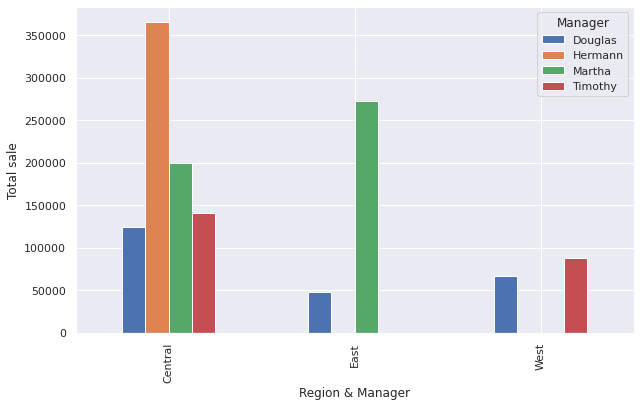

In [ ]:
import seaborn as sns
%matplotlib inline     
import matplotlib.pyplot as plt
sns.set()            #visualisation     
SaleData.pivot_table("Sale_amt", index="Region",columns="Manager", aggfunc="sum").plot(kind="bar", figsize=(10,6))
plt.xlabel("Region & Manager")
plt.ylabel("Total sale");

**TASK-6B**

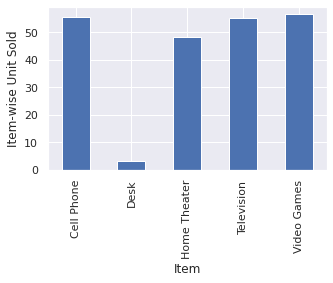

In [ ]:
SaleData.pivot_table("Units",index="Item",aggfunc="mean").plot(kind="bar",figsize=(5,3), legend=None)
plt.ylabel("Item-wise Unit Sold");

**TASK-6C**

Text(0, 0.5, 'Mean Value of Sale Amount')

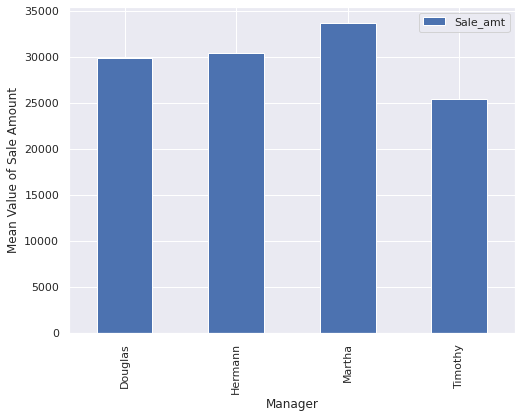

In [ ]:
SaleData.pivot_table("Sale_amt", index="Manager", aggfunc="mean").plot(kind="bar", figsize=(8,6))
plt.ylabel("Mean Value of Sale Amount")